# **Build an Image Search Engine using Linear Algebra**

**Step 1:** Load the Data.  
**Step 2:** Exploratory Data Analysis.  
**Step 3:** Building a Similarity Based Search Engine

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
image_df = pd.read_csv('data/mnist.csv')

image_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
image_df.shape

(1797, 65)

## **Exploratory Data Analysis**

### **a. Analysing the Distribution of Target Variable**

<Axes: xlabel='label', ylabel='count'>

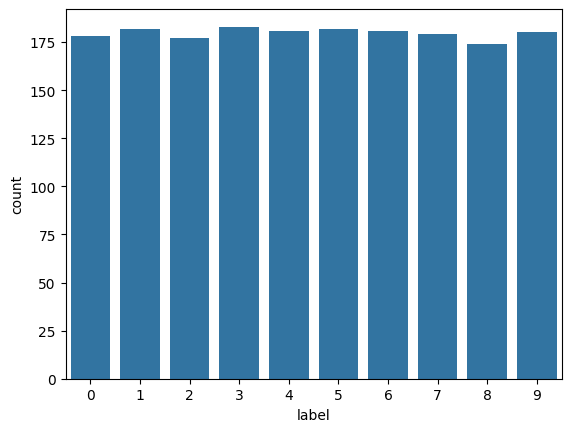

In [4]:
# Distribution Check for Target Variable

sns.countplot(data=image_df, x='label')

### **b. Visualizing the Images**

Randomly Generated index: 707
Label of image at 707 index: 7

Data Type of Image Array: float64
Image Array:
 [[ 0.  0.  1.  6. 12. 16.  9.  0.]
 [ 0.  0. 10. 15. 10. 13.  9.  0.]
 [ 0.  0.  2.  1.  0. 14.  2.  0.]
 [ 0.  0.  0.  6. 12. 16. 15.  0.]
 [ 0.  0.  5. 16. 16. 14.  7.  0.]
 [ 0.  0.  3.  6. 15.  0.  0.  0.]
 [ 0.  0.  0.  7.  9.  0.  0.  0.]
 [ 0.  0.  0. 11.  2.  0.  0.  0.]]


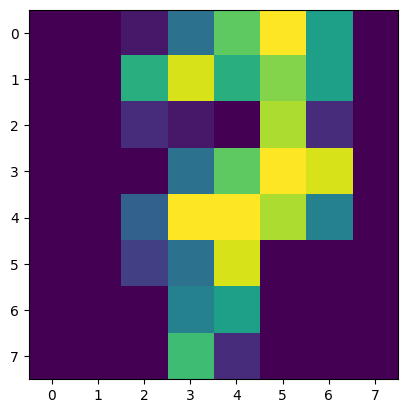

In [5]:
idx = np.random.randint(0, 1796)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (8,8))

print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

[ 695   44  944  137  821 1397 1381 1041  785]


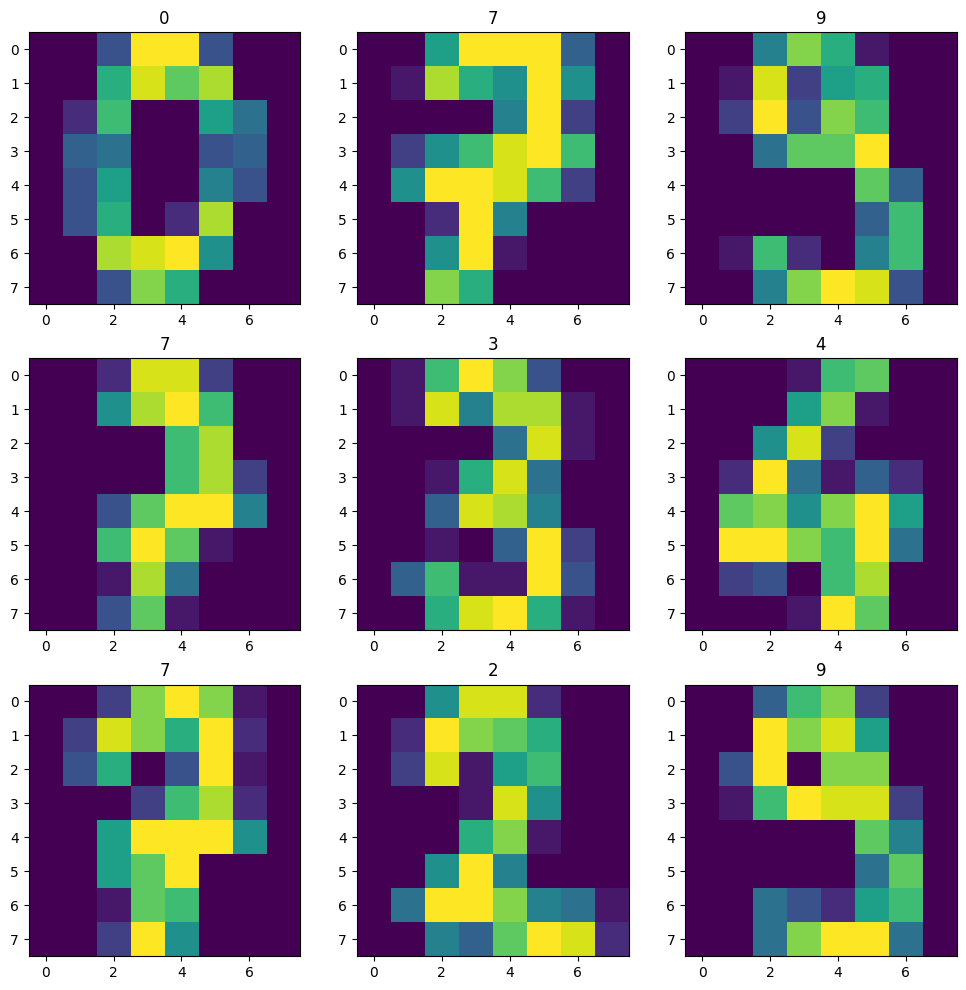

In [6]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, image_df.shape[0], 9)
print(idx)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    label = image_df.iloc[idx[i], -1]
    plt.title(label)
    img_grid = np.reshape(image_df.iloc[idx[i], 0:-1], (8,8))
    img_grid = img_grid.astype("float")
    plt.imshow(img_grid)

### **c. Low Dimensional Scatter Plot Visualization**

In [7]:
image_df.iloc[:, 0:-1].values

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

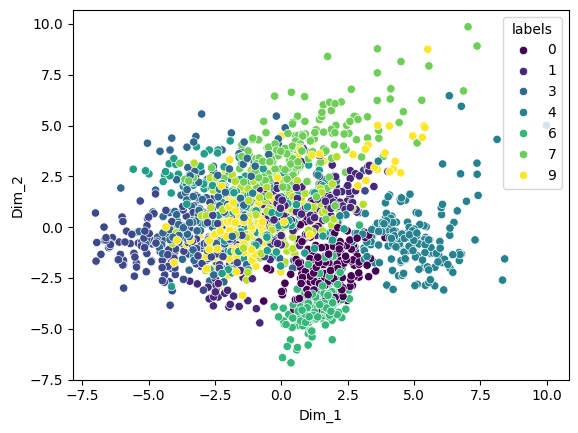

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

imgs_num_representation = image_df.iloc[:, 0:-1].values

# Standardize the imgs_num_representation
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(imgs_num_representation)

# Creating the object of PCA
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = image_df.iloc[:, -1]

# Assign labels to scatter plot based on the unique values in 'labels' column
sns.scatterplot(data=pca_df, x='Dim_1', y='Dim_2', hue='labels', palette='viridis')
plt.show()

#### **Observation**

Looks like there exist clusters in the available data.

## **Building a Similarity Based Search Engine**

In [9]:
from sklearn.metrics import pairwise

def similarity_finder(search_query, k):
    # Query Vector
    search_query_vector = [search_query]
    
    # Similarity Calculation
    similarity_scores = pairwise.cosine_similarity(search_query_vector, image_df.iloc[:, 0:-1].values).flatten()
    # print(sorted(similarity_scores))

    similar_doc_indices = similarity_scores.argsort()
    # print(similarity_scores[similar_doc_indices])
    # print(similar_doc_indices)
    # print(similar_doc_indices[::-1])

    # Ranking and Retrieval
    return image_df.loc[similar_doc_indices[::-1]].head(k)

Randomly Generated index: 769
Label of image at 769 index: 8

Data Type of Image Array: float64
Image Array:
 [[ 0.  0.  4. 15.  7.  0.  0.  0.]
 [ 0.  1. 13. 12. 16.  2.  2.  0.]
 [ 0.  7. 11.  0. 11. 12.  1.  0.]
 [ 0.  4.  8.  6. 13.  3.  0.  0.]
 [ 0.  3. 16. 15.  1.  0.  0.  0.]
 [ 0.  2. 16. 14.  6.  0.  0.  0.]
 [ 0.  3. 16. 10. 14.  3.  0.  0.]
 [ 0.  0.  2.  9. 12.  3.  0.  0.]]


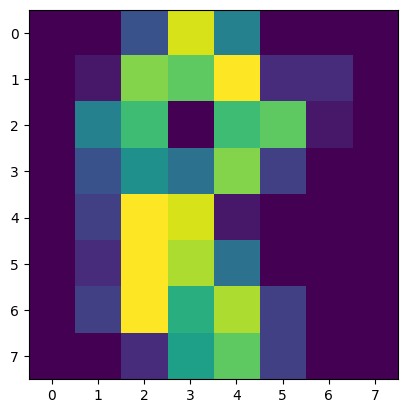

In [10]:
idx = np.random.randint(0, 1796)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (8,8))

print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

In [11]:
image_df.iloc[idx, 0:-1].values

array([ 0.,  0.,  4., 15.,  7.,  0.,  0.,  0.,  0.,  1., 13., 12., 16.,
        2.,  2.,  0.,  0.,  7., 11.,  0., 11., 12.,  1.,  0.,  0.,  4.,
        8.,  6., 13.,  3.,  0.,  0.,  0.,  3., 16., 15.,  1.,  0.,  0.,
        0.,  0.,  2., 16., 14.,  6.,  0.,  0.,  0.,  0.,  3., 16., 10.,
       14.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 12.,  3.,  0.,  0.])

In [12]:
similar_imgs = similarity_finder(search_query=image_df.iloc[idx, 0:-1].values, k=9)

similar_imgs

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
769,0.0,0.0,4.0,15.0,7.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,9.0,12.0,3.0,0.0,0.0,8
1410,0.0,0.0,4.0,15.0,15.0,4.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,3.0,15.0,15.0,0.0,0.0,0.0,8
76,0.0,3.0,5.0,14.0,13.0,6.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,3.0,15.0,16.0,5.0,0.0,0.0,8
1305,0.0,0.0,4.0,16.0,14.0,3.0,0.0,0.0,2.0,14.0,...,0.0,0.0,0.0,4.0,15.0,16.0,3.0,0.0,0.0,8
804,0.0,0.0,0.0,8.0,14.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,10.0,16.0,5.0,0.0,0.0,8
742,0.0,0.0,4.0,14.0,14.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,11.0,3.0,0.0,0.0,8
775,0.0,0.0,4.0,11.0,15.0,7.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,4.0,14.0,16.0,6.0,0.0,0.0,8
1596,0.0,0.0,7.0,15.0,15.0,6.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,5.0,15.0,15.0,2.0,0.0,0.0,8
760,0.0,0.0,0.0,8.0,15.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,2.0,0.0,0.0,8


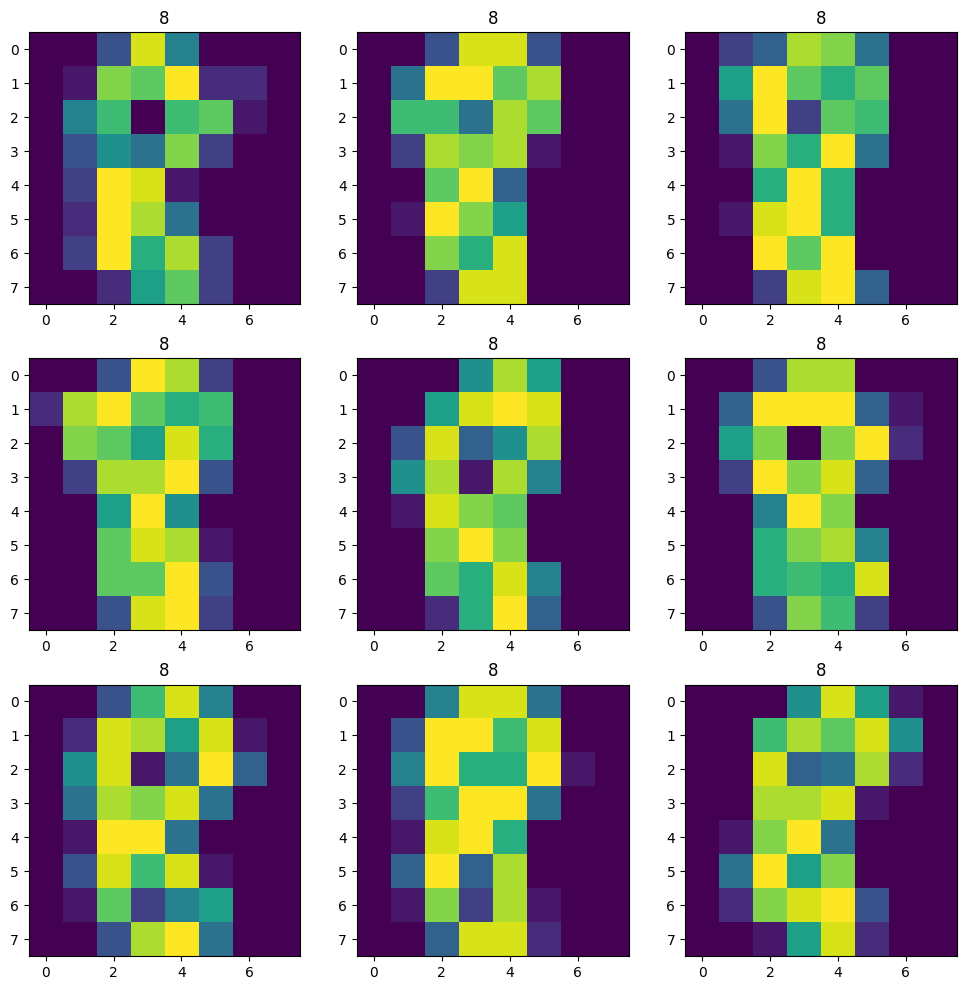

In [13]:
plt.figure(figsize=(12, 12))
idxs = similar_imgs.index

for i in range(len(idxs)):
    plt.subplot(3, 3, i+1)
    plt.title(f"{similar_imgs.iloc[i, -1]}")
    img_grid = np.reshape(similar_imgs.iloc[i, 0:-1].values, (8,8))
    plt.imshow(img_grid)